In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
## Collect_Data
data = pd.read_csv("datasets/housing.csv")

In [ ]:
## Manually made ( Train Test split ) fumction

def train_test_split(Data,test_ratio,random_state):
    np.random.seed(random_state)
    shuffle_data = np.random.permutation(len(Data))
    print(shuffle_data)
    test_rat = int(len(Data)*test_ratio)
    test_indices = shuffle_data[:test_rat]
    train_indices = shuffle_data[test_rat:]
    return Data.iloc[test_indices]
print(train_test_split(data,0.2,42))


[20046  3024 15663 ...  5390   860 15795]
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20046    -122.38     40.67                10.0       2281.0           444.0   
3024     -118.37     33.83                35.0       1207.0           207.0   
15663    -117.24     32.72                39.0       3089.0           431.0   
20484    -118.44     34.05                18.0       4780.0          1192.0   
9814     -118.44     34.18                33.0       2127.0           414.0   
...          ...       ...                 ...          ...             ...   
15362    -121.92     40.52                13.0       4581.0           881.0   
16623    -122.08     37.68                26.0       2607.0           682.0   
18086    -119.00     35.39                42.0       2839.0           516.0   
2144     -117.92     33.63                39.0       1469.0           226.0   
3665     -118.39     34.02                38.0       2447.0           636.0   

       po

Text(0, 0.5, 'Number of districts')

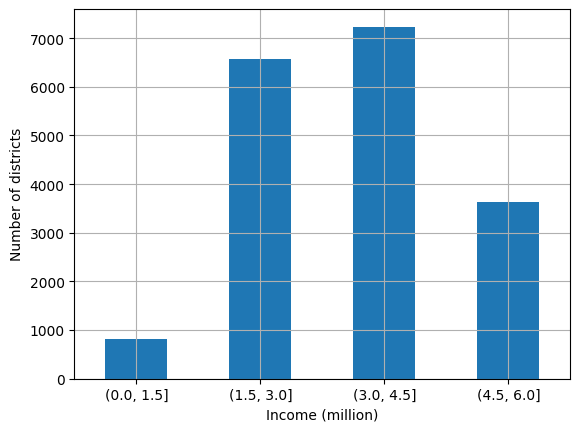

In [19]:
vzt_data = data.copy()

vzt_data["income_cat"] = pd.cut(vzt_data['median_income'],bins=[0,1.5,3,4.5,6])

vzt_data["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income (million)")
plt.ylabel("Number of districts")

In [ ]:
## Replacing Ocean_Proximity(Non-Numarical Data) data in to their co-related_value
## Their is a great function for this in scikit-learn called OrdinalEncoder

ocean_map = {
    '<1H OCEAN': 1,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    'ISLAND': 5,
    'INLAND': 2
}

In [22]:
## Can only be used once neither it will be error
data['ocean_proximity'] = data['ocean_proximity'].str.strip()
data['ocean_proximity'] = data['ocean_proximity'].map(ocean_map)

In [25]:
## Train Test Split from Scikit-Learn
from sklearn.model_selection import train_test_split as tts
train_set,test_set = tts(data,test_size=0.2,random_state=42)

## Save training and test data set in csv file
train_set.to_csv('train_set.csv',index=False)
test_set.to_csv('test_set.csv',index=False)

test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,2
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,1
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,3
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,1
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,1
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,2
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,4
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,2
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,1
